In [1]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


## Greedy Algorithms
### Prims algorithm

We learn prims algorithm using a real life application

A telecommunications organization has offices spanned across multiple
locations around the globe. It has to use leased phone lines for connecting all these offices with
each other. The organization, wants to use minimum cost for connecting all its offices. This
requires that all the offices should be connected using a minimum number of leased lines so as to
reduce the effective cost.

Consider the following for deciding connections in same state in India:
i. Find the latitude and longitude of cities in same state. Consider 4 to 6 cities.
ii. Calculate the cost of connecting each pair of offices by computing the distance
between different pair of different cities (as considered in part A) and construct a
fully connected graph.

We use Python Liberary geopy for getting latitude and laungitudes of different cities and calcualting distances based on them

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "practical_3")

In [13]:
cities = list(map(str, input("Enter cities: ").split()))
locations = []
for i in cities:
    locations.append(geolocator.geocode(i))

Enter cities: Nagpur Mumbai Pune Akola Amravati


In [14]:
coordinates = dict()
for i in locations:
    coordinates[i.address.split(',')[0]] = [i.latitude, i.longitude]

In [15]:
coordinates

{'Nagpur': [21.1498134, 79.0820556],
 'Mumbai Suburban': [19.0785451, 72.878176],
 'Pune City': [18.521428, 73.8544541],
 'Akola': [20.76181225, 77.1921156663574],
 'Amravati': [21.15454115, 77.64429617998744]}

In [16]:
from geopy.distance import geodesic
distances = [[0]*len(cities) for _ in range(len(cities))]
i1 = 0
j1 = 0
for i in coordinates.keys():
    j1 = 0
#     print(i1)
    for j in coordinates.keys():
#         print(j1)
        if i == j:
            distances[i1][j1] = 999999.9
        else:
            distances[i1][j1] = geodesic(coordinates[i], coordinates[j]).miles
        j1 += 1
    i1 += 1

In [17]:
for i in range (len(cities)):
    print(distances[i])

[999999.9, 427.50202366902516, 385.2763086761522, 125.01586557857478, 92.79109381977645]
[427.50202366902516, 999999.9, 74.55029367126821, 303.5807011596681, 340.9961354641908]
[385.2763086761522, 74.55029367126821, 999999.9, 266.55729508861265, 306.00975166427065]
[125.01586557857478, 303.5807011596681, 266.55729508861265, 999999.9, 39.79746289452395]
[92.79109381977645, 340.9961354641908, 306.00975166427065, 39.79746289452395, 999999.9]


In [18]:
#prims algorithm 
import numpy as  np
def prims(cost, n, t, near):
    #finding best entry k,l
    k,l = np.unravel_index(np.argmin(cost), cost.shape)
    #np.argmin(arr) finds the index of the minimum element when the array is flattened
    #np.unravel_index converts this flattened index to the corresponding index in the original 2D array.
    
    #filling the best entry in t for TTF
    t[0][0] = k
    t[0][1] = l
    t[0][2] = cost[k][l]
    #initialising the near array based on best entry t , l
    for i in range (0,n):
        if cost[i][l] < cost[i][k]:
            near[i] = l
        else:
            near[i] = k
    near[l] = near[k] = 0
    #finding j such that near[j] != 0 and cost[j,near[j]] is minimum
    for i in range (1,n-1):
        minimum = 999999
        j = 0
        for k in range (n):
            if near[k] != 0 and cost[k][near[k]] < minimum:
                j = k
                minimum = cost[k][near[k]]
        #updating t array for TTF
        t[i][0] = j
        t[i][1] = near[j]
        t[i][2] = cost[j][near[j]]
        near[j] = 0
        #updating near array
        for k in range(0,n):
            if near[k] != 0 and cost[k][j] < cost[k][near[k]]:
                near[k] = j
                
    #returning result
    return t, near

In [19]:
#calling prims function
n = len(cities)
t = [[0]*(3) for _ in range(n-1)]
near = [0]*n
cost = np.array(distances)
t, near = prims(cost, n, t, near)

In [20]:
print(t)

[[3, 4, 39.79746289452395], [0, 4, 92.79109381977645], [2, 3, 266.55729508861265], [1, 2, 74.55029367126821]]


In [21]:
#calculating total distance of connecting offices
t_dist = 0
for i in range (n-1):
    t_dist += t[i][2]
print(t_dist)

473.69614547418126


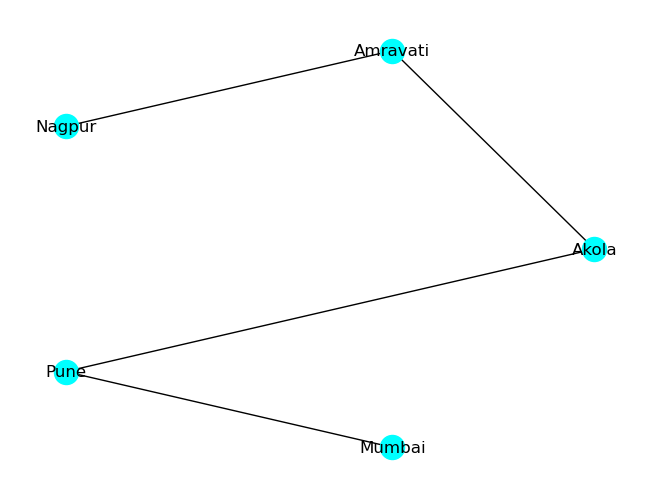

In [22]:
#plotting MST
import networkx as nx
g = nx.Graph()
for i in t:
    g.add_edge(i[0],i[1])
labeldict = {}
for i in range(len(cities)):
    labeldict[i] = cities[i]
nx.draw_circular(g, labels=labeldict, node_color="cyan", with_labels = True)

Hence, we can find the minimum spanning tree for the given cities